What are the variable that affect life expectancy, and what measures can countries take in order to improve the average lifespan of people?

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('../../DATA/led.csv')

In [3]:
df.head().transpose()

,0,1,2,3,4
Country,Afghanistan,Afghanistan,Afghanistan,Afghanistan,Afghanistan
Year,2015,2014,2013,2012,2011
Status,Developing,Developing,Developing,Developing,Developing
Lifeexpectancy,65,59.9,59.9,59.5,59.2
AdultMortality,263,271,268,272,275
infantdeaths,62,64,66,69,71
Alcohol,0.01,0.01,0.01,0.01,0.01
percentageexpenditure,71.2796,73.5236,73.2192,78.1842,7.09711
HepatitisB,65,62,64,67,68
Measles,1154,492,430,2787,3013


In [4]:
df.columns

Index(['Country', 'Year', 'Status', 'Lifeexpectancy', 'AdultMortality',
       'infantdeaths', 'Alcohol', 'percentageexpenditure', 'HepatitisB',
       'Measles', 'BMI', 'under-fivedeaths', 'Polio', 'Totalexpenditure',
       'Diphtheria', 'HIV/AIDS', 'GDP', 'Population', 'thinness1-19years',
       'thinness5-9years', 'Incomecompositionofresources', 'Schooling'],
      dtype='object')

In [5]:
len(df)

2938

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2938 entries, 0 to 2937
Data columns (total 22 columns):
Country                         2938 non-null object
Year                            2938 non-null int64
Status                          2938 non-null object
Lifeexpectancy                  2928 non-null float64
AdultMortality                  2928 non-null float64
infantdeaths                    2938 non-null int64
Alcohol                         2744 non-null float64
percentageexpenditure           2938 non-null float64
HepatitisB                      2385 non-null float64
Measles                         2938 non-null int64
BMI                             2904 non-null float64
under-fivedeaths                2938 non-null int64
Polio                           2919 non-null float64
Totalexpenditure                2712 non-null float64
Diphtheria                      2919 non-null float64
HIV/AIDS                        2938 non-null float64
GDP                             2490 no

In [7]:
df.isnull().sum()

Country                           0
Year                              0
Status                            0
Lifeexpectancy                   10
AdultMortality                   10
infantdeaths                      0
Alcohol                         194
percentageexpenditure             0
HepatitisB                      553
Measles                           0
BMI                              34
under-fivedeaths                  0
Polio                            19
Totalexpenditure                226
Diphtheria                       19
HIV/AIDS                          0
GDP                             448
Population                      652
thinness1-19years                34
thinness5-9years                 34
Incomecompositionofresources    167
Schooling                       163
dtype: int64

In [11]:
df.corr()['Lifeexpectancy'].drop('Lifeexpectancy').sort_values()

AdultMortality                 -0.696359
HIV/AIDS                       -0.556556
thinness1-19years              -0.477183
thinness5-9years               -0.471584
under-fivedeaths               -0.222529
infantdeaths                   -0.196557
Measles                        -0.157586
Population                     -0.021538
Year                            0.170033
Totalexpenditure                0.218086
HepatitisB                      0.256762
percentageexpenditure           0.381864
Alcohol                         0.404877
GDP                             0.461455
Polio                           0.465556
Diphtheria                      0.479495
BMI                             0.567694
Incomecompositionofresources    0.724776
Schooling                       0.751975
Name: Lifeexpectancy, dtype: float64

In [39]:
df[df['Incomecompositionofresources'].between(0.74, 0.75)].corr().loc['Lifeexpectancy', 'BMI']

0.0004899295547718596

In [38]:
df.corr().loc['Incomecompositionofresources', 'Population']

-0.008734835739696982

In [41]:
df.corr()['Population'].drop('Population').sort_values()

HepatitisB                     -0.123321
Totalexpenditure               -0.079662
BMI                            -0.072301
Polio                          -0.038540
Alcohol                        -0.035252
Schooling                      -0.031668
Diphtheria                     -0.028444
GDP                            -0.028270
HIV/AIDS                       -0.027854
percentageexpenditure          -0.025662
Lifeexpectancy                 -0.021538
AdultMortality                 -0.013647
Incomecompositionofresources   -0.008735
Year                            0.016969
thinness5-9years                0.251403
thinness1-19years               0.253944
Measles                         0.265966
under-fivedeaths                0.544423
infantdeaths                    0.556801
Name: Population, dtype: float64

In [54]:
df[(df['Alcohol'].between(0.0, 1.0))&(df['percentageexpenditure'].between(1000,1500))].corr().loc['Lifeexpectancy', 'Incomecompositionofresources']

0.4901727662664701

In [52]:
len(df[(df['Alcohol'].between(0.0, 1.0))&(df['percentageexpenditure'].between(1000,2000))])

19

In [47]:
len(df['Alcohol'].between(0.0, 1.0))

2938

In [55]:
exp = (df['Lifeexpectancy'] - df['Lifeexpectancy'].mean())/df['Lifeexpectancy'].std()

In [56]:
exp

0      -0.443615
1      -0.979112
2      -0.979112
3      -1.021112
4      -1.052611
          ...   
2933   -2.617102
2934   -2.596102
2935   -2.564602
2936   -2.512103
2937   -2.438603
Name: Lifeexpectancy, Length: 2938, dtype: float64

In [60]:
from sklearn.preprocessing import StandardScaler

In [62]:
scaler = StandardScaler()

In [67]:
print(type(scaler))

<class 'sklearn.preprocessing.data.StandardScaler'>


In [76]:
df_new = df[['Incomecompositionofresources', 'Alcohol', 'percentageexpenditure', 'Lifeexpectancy']]

In [78]:
df_new = df_new.dropna()

In [79]:
df_new.isnull().sum()

Incomecompositionofresources    0
Alcohol                         0
percentageexpenditure           0
Lifeexpectancy                  0
dtype: int64

In [80]:
len(df)

2938

In [81]:
X = df_new[['Incomecompositionofresources', 'Alcohol', 'percentageexpenditure']]
y = df_new[['Lifeexpectancy']]

In [82]:
len(X), len(y)

(2584, 2584)

In [85]:
scaled_X = scaler.fit_transform(X)
scaled_y = scaler.fit_transform(y)

In [86]:
from sklearn.linear_model import LinearRegression

In [94]:
model = LinearRegression()

In [95]:
model.fit(scaled_X, scaled_y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [99]:
model.coef_

array([[0.63613152, 0.04290936, 0.14256892]])

In [97]:
model.intercept_

array([-4.75190712e-16])

In [100]:
model.get_params()

{'copy_X': True, 'fit_intercept': True, 'n_jobs': None, 'normalize': False}

In [187]:
def find_correlation(df, var1, var2, *args):
    "Find the correlation between two variables conditional on other variables."
    features = [var1, var2]
    features.extend(list(args))
    df_new = df[features]
    df_new = df_new.dropna()
    X = df_new.drop(var1, axis=1)
    y = df_new[[var1]]
    
    scaler = StandardScaler()
    scaled_X = scaler.fit_transform(X)
    scaled_y = scaler.fit_transform(y)
    
    model = LinearRegression()
    model.fit(scaled_X, scaled_y)
    return model.coef_[0,0]

In [129]:
df.columns

Index(['Country', 'Year', 'Status', 'Lifeexpectancy', 'AdultMortality',
       'infantdeaths', 'Alcohol', 'percentageexpenditure', 'HepatitisB',
       'Measles', 'BMI', 'under-fivedeaths', 'Polio', 'Totalexpenditure',
       'Diphtheria', 'HIV/AIDS', 'GDP', 'Population', 'thinness1-19years',
       'thinness5-9years', 'Incomecompositionofresources', 'Schooling'],
      dtype='object')

In [160]:
df.corr()

,Year,Lifeexpectancy,AdultMortality,infantdeaths,Alcohol,percentageexpenditure,HepatitisB,Measles,BMI,under-fivedeaths,Polio,Totalexpenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness1-19years,thinness5-9years,Incomecompositionofresources,Schooling
Year,1.000000,0.170033,-0.079052,-0.037415,-0.052990,0.031400,0.104333,-0.082493,0.108974,-0.042937,0.094158,0.090740,0.134337,-0.139741,0.101620,0.016969,-0.047876,-0.050929,0.243468,0.209400
Lifeexpectancy,0.170033,1.000000,-0.696359,-0.196557,0.404877,0.381864,0.256762,-0.157586,0.567694,-0.222529,0.465556,0.218086,0.479495,-0.556556,0.461455,-0.021538,-0.477183,-0.471584,0.724776,0.751975
AdultMortality,-0.079052,-0.696359,1.000000,0.078756,-0.195848,-0.242860,-0.162476,0.031176,-0.387017,0.094146,-0.274823,-0.115281,-0.275131,0.523821,-0.296049,-0.013647,0.302904,0.308457,-0.457626,-0.454612
infantdeaths,-0.037415,-0.196557,0.078756,1.000000,-0.115638,-0.085612,-0.223566,0.501128,-0.227279,0.996629,-0.170689,-0.128616,-0.175171,0.025231,-0.108427,0.556801,0.465711,0.471350,-0.145139,-0.193720
Alcohol,-0.052990,0.404877,-0.195848,-0.115638,1.000000,0.341285,0.087549,-0.051827,0.330408,-0.112370,0.221734,0.296942,0.222020,-0.048845,0.354712,-0.035252,-0.428795,-0.417414,0.450040,0.547378
percentageexpenditure,0.031400,0.381864,-0.242860,-0.085612,0.341285,1.000000,0.016274,-0.056596,0.228700,-0.087852,0.147259,0.174420,0.143624,-0.097857,0.899373,-0.025662,-0.251369,-0.252905,0.381952,0.389687
HepatitisB,0.104333,0.256762,-0.162476,-0.223566,0.087549,0.016274,1.000000,-0.120529,0.150380,-0.233126,0.486171,0.058280,0.611495,-0.112675,0.083903,-0.123321,-0.120429,-0.124960,0.199549,0.231117
Measles,-0.082493,-0.157586,0.031176,0.501128,-0.051827,-0.056596,-0.120529,1.000000,-0.175977,0.507809,-0.136166,-0.106241,-0.141882,0.030899,-0.076466,0.265966,0.224808,0.221072,-0.129568,-0.137225
BMI,0.108974,0.567694,-0.387017,-0.227279,0.330408,0.228700,0.150380,-0.175977,1.000000,-0.237669,0.284569,0.242503,0.283147,-0.243717,0.301557,-0.072301,-0.532025,-0.538911,0.508774,0.546961
under-fivedeaths,-0.042937,-0.222529,0.094146,0.996629,-0.112370,-0.087852,-0.233126,0.507809,-0.237669,1.000000,-0.188720,-0.130148,-0.195668,0.038062,-0.112081,0.544423,0.467789,0.472263,-0.163305,-0.209373


In [197]:
find_correlation(df[df['Status']=='Developing'], 'Lifeexpectancy', 'GDP', 'percentageexpenditure', 'Totalexpenditure', 'Alcohol', 'Schooling', 'BMI', 'AdultMortality', 'infantdeaths', 'under-fivedeaths', 'HepatitisB',
       'Measles', 'BMI', 'Polio', 'Diphtheria', 'HIV/AIDS', 'thinness1-19years', 'thinness5-9years', 'Population')

0.01801152928899941

In [125]:
df.corr().loc['Lifeexpectancy', 'Incomecompositionofresources']

0.7247759785960601

In [188]:
find_correlation(df, 'Lifeexpectancy', 'Incomecompositionofresources')

0.7247759785960608

In [189]:
find_correlation(df, 'Incomecompositionofresources', 'Lifeexpectancy')

0.7247759785960615

In [190]:
find_correlation(df, 'Incomecompositionofresources', 'Lifeexpectancy', 'Alcohol', 'percentageexpenditure')

0.6070424319729119

In [191]:
df.columns

Index(['Country', 'Year', 'Status', 'Lifeexpectancy', 'AdultMortality',
       'infantdeaths', 'Alcohol', 'percentageexpenditure', 'HepatitisB',
       'Measles', 'BMI', 'under-fivedeaths', 'Polio', 'Totalexpenditure',
       'Diphtheria', 'HIV/AIDS', 'GDP', 'Population', 'thinness1-19years',
       'thinness5-9years', 'Incomecompositionofresources', 'Schooling',
       'ChildrenMortality'],
      dtype='object')

In [195]:
find_correlation(df[df['Status']=='Developed'], 'Lifeexpectancy', 'GDP', 'percentageexpenditure', 'Totalexpenditure', 'Alcohol')

0.07783805020654073

In [178]:
df.columns

Index(['Country', 'Year', 'Status', 'Lifeexpectancy', 'AdultMortality',
       'infantdeaths', 'Alcohol', 'percentageexpenditure', 'HepatitisB',
       'Measles', 'BMI', 'under-fivedeaths', 'Polio', 'Totalexpenditure',
       'Diphtheria', 'HIV/AIDS', 'GDP', 'Population', 'thinness1-19years',
       'thinness5-9years', 'Incomecompositionofresources', 'Schooling',
       'ChildrenMortality'],
      dtype='object')

In [177]:
df['ChildrenMortality'] = (df['infantdeaths'] + df['under-fivedeaths'])/2

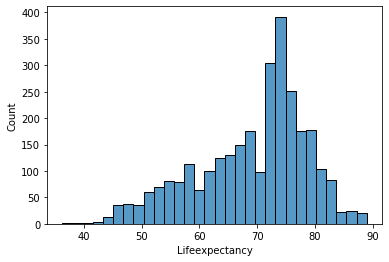

In [162]:
sns.histplot(data=df, x='Lifeexpectancy');

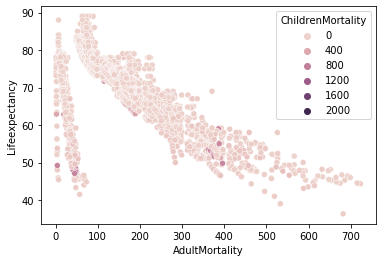

In [179]:
sns.scatterplot(data=df, x='AdultMortality', y='Lifeexpectancy', hue='ChildrenMortality');

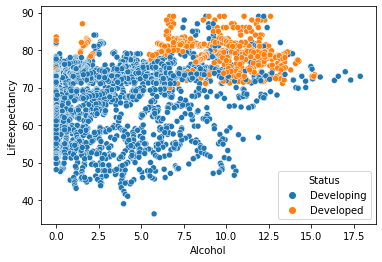

In [181]:
sns.scatterplot(data=df, x='Alcohol', y='Lifeexpectancy', hue='Status');

In [182]:
df.corr().loc['Alcohol', 'Lifeexpectancy']

0.4048767611266013

In [183]:
df[df['Status']=='Developing'].corr().loc['Alcohol', 'Lifeexpectancy']

0.203429015205791

In [184]:
df[df['Status']=='Developed'].corr().loc['Alcohol', 'Lifeexpectancy']

-0.2877693621506767

In [186]:
df[df['Status']=='Developing'].corr().loc['Alcohol', 'Lifeexpectancy'] * len(df[df['Status']=='Developing'])/len(df) + df[df['Status']=='Developed'].corr().loc['Alcohol', 'Lifeexpectancy'] * len(df[df['Status']=='Developed'])/len(df)

0.11782875339281906

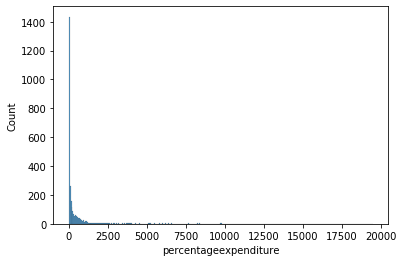

In [198]:
sns.histplot(data=df, x='percentageexpenditure');

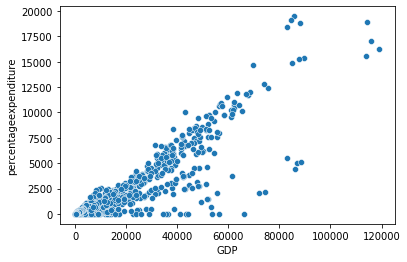

In [199]:
sns.scatterplot(data=df, x='GDP', y='percentageexpenditure');

Next steps:  
- more EDA  
- clarify the relations between the variables, construct the correct causal diagram
- identify interventions that would increase the life expectancy and quantify them  
- construct an algorithm that predicts the life expectancy based on the other features